# Monte Carlo Simulation on Coca Cola Stock Price

The purpose of this analyis is to project the price of Coca Cola's stock 100 days into the future using a Monte Carlo simulation. This will be applied using the principles of brownian motion and Stochastics

In [128]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm

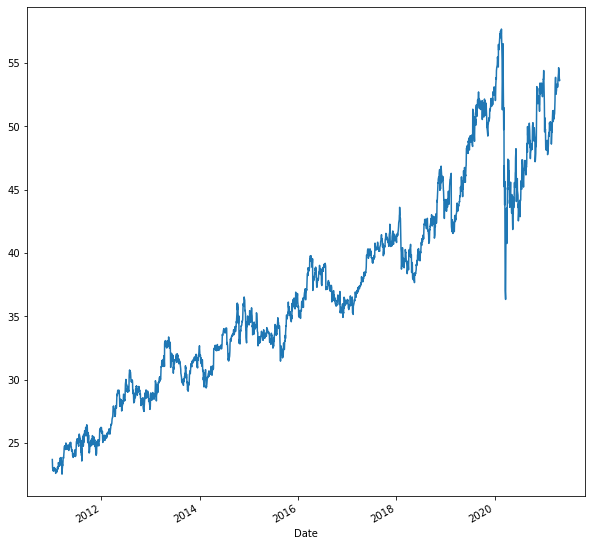

In [129]:
# Download closing market prices for Coca Cola from 01/01/2011 and plot

coke_prices = wb.DataReader('KO', data_source='yahoo', start='2011-1-1')['Adj Close']
coke_prices.plot(figsize=(10,10))

Text(0, 0.5, 'Frequency')

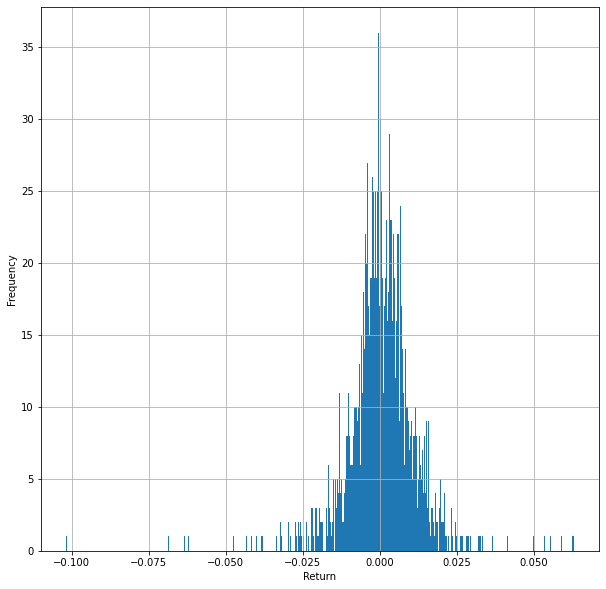

In [130]:
# Plot logarithm of returns on prices and represent as histogram

log_changes = np.log(1 + coke_prices.pct_change())

log_changes.iloc[1:].hist(bins=1000, figsize=(10,10))
plt.xlabel("Return")
plt.ylabel("Frequency")

In [131]:
# Calculate Drift variable = mean - (0.5 x variance) 

u = log_changes.mean()
var = log_changes.var()
drift = u - (0.5*var)

In [132]:
# Calculate standard deviation and generate matrix of random variables (i.e. normally distributed values across 100 days for 10,000 trials)

# Standard deviation
stdv = log_changes.std()

# Random variables (normally distibuted)
days = 100
trials = 10000
Z = norm.ppf(np.random.rand(days, trials))

In [133]:
# Calculate projected returns using drift and volatility and then find different price projections 100 days into the future

returns = np.exp(drift + stdv*Z)

# Build matrix of projected prices where day 1 equals last closing price
projected_prices = np.zeros_like(returns)
projected_prices[0] = coke_prices[-1]

for t in range(1, days):
    projected_prices[t] = projected_prices[t-1] * returns[t]

projected_prices = pd.DataFrame(projected_prices)

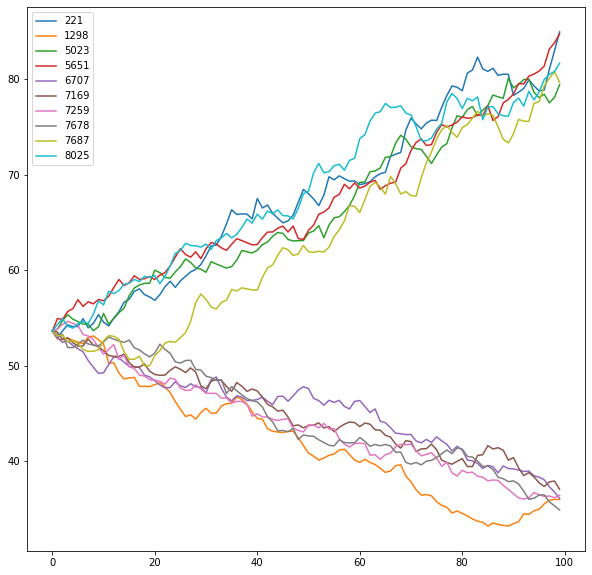

In [134]:
# Calculate top 5 and bottom 5 projected prices on day 100 and plot projections

top_5 = projected_prices.iloc[99, :].sort_values(ascending=False)[:5]
bottom_5 = projected_prices.iloc[99, :].sort_values(ascending=False)[-5:]
top_and_bottom = top_5 + bottom_5
projected_prices[top_and_bottom.index].plot(figsize=(10,10))


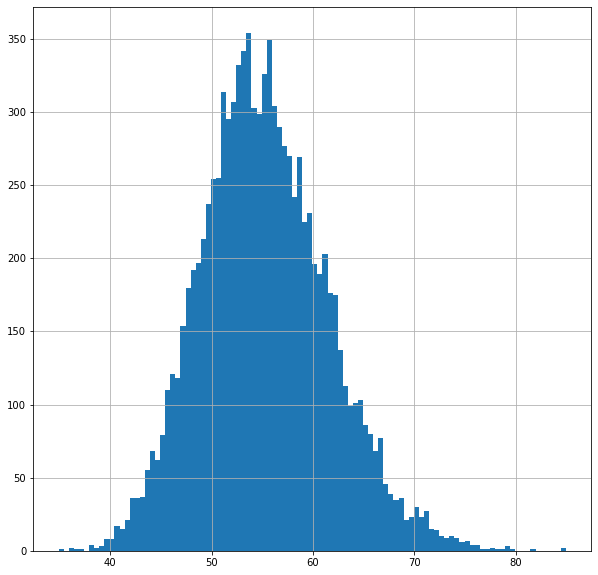

In [135]:
# Histogram of expected price projections

projected_prices.iloc[99, :].hist(bins=100, figsize=(10,10))

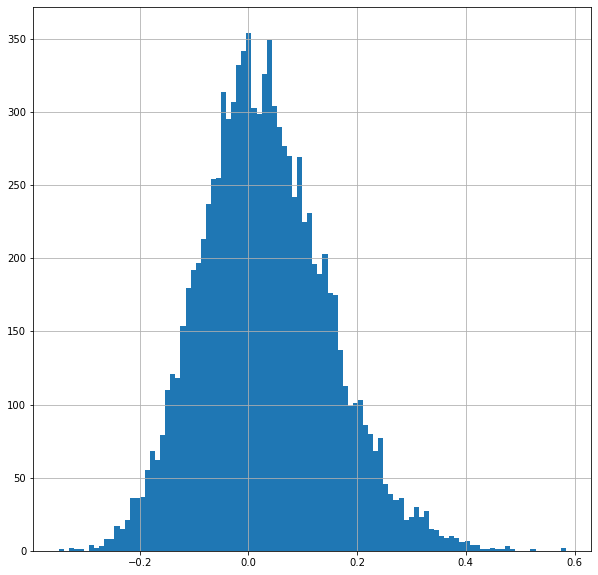

In [136]:
# Projected returns
projected_returns = (projected_prices.iloc[99, :] - projected_prices.iloc[0,:]) / projected_prices.iloc[0,:]
projected_returns.hist(bins=100, figsize=(10,10))

In [137]:
print(f"Average Projected Return: {projected_returns.mean():.2%}") 
print(f"Median Projected Return: {projected_returns.median():.2%}")


Average Projected Return: 3.02%
Median Projected Return: 2.33%
